In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error,roc_curve, roc_auc_score
from sklearn import metrics

df = pd.read_table('titanic-passengers.csv', delimiter =";") 
df["Survived"] = df["Survived"].map({"Yes" : 1 , "No" : 0})
df["Sex"] = df["Sex"].map({"male" : 1 , "female" : 0})
df["Age"].fillna(df["Age"].median() , inplace =True)
df["Age"] = df["Age"].map(int)



df["Embarked"].fillna("C" , inplace =True)

df = df.drop('Cabin',axis=1)
df[['Role','fullName']] = df.Name.str.split(",",expand=True)

df[['Value','Pseudo' , 'NameDesc']] = df["fullName"].str.split(".",expand=True)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Role,fullName,Value,Pseudo,NameDesc
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28,0,0,248740,13.0000,S,Collander,Mr. Erik Gustaf,Mr,Erik Gustaf,None
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25,0,0,348123,7.6500,S,Moen,Mr. Sigurd Hansen,Mr,Sigurd Hansen,None
2,641,0,3,"Jensen, Mr. Hans Peder",1,20,0,0,350050,7.8542,S,Jensen,Mr. Hans Peder,Mr,Hans Peder,None
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29,0,4,349909,21.0750,S,Palsson,Mrs. Nils (Alma Cornelia Berglund),Mrs,Nils (Alma Cornelia Berglund),None
4,672,0,1,"Davidson, Mr. Thornton",1,31,1,0,F.C. 12750,52.0000,S,Davidson,Mr. Thornton,Mr,Thornton,None


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Role         891 non-null    object 
 12  fullName     891 non-null    object 
 13  Value        891 non-null    object 
 14  Pseudo       891 non-null    object 
 15  NameDesc     1 non-null      object 
dtypes: float64(1), int64(7), object(8)
memory usage: 111.5+ KB


In [63]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Role,fullName,Value,Pseudo,NameDesc
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14,1,0,237736,30.0708,C,Nasser,Mrs. Nicholas (Adele Achem),Mrs,Nicholas (Adele Achem),None
887,61,0,3,"Sirayanian, Mr. Orsen",1,22,0,0,2669,7.2292,C,Sirayanian,Mr. Orsen,Mr,Orsen,None
888,535,0,3,"Cacic, Miss. Marija",0,30,0,0,315084,8.6625,S,Cacic,Miss. Marija,Miss,Marija,None
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,28,0,0,349215,7.8958,S,Petroff,"Mr. Pastcho (""Pentcho"")",Mr,"Pastcho (""Pentcho"")",None
890,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",0,19,0,0,250655,26.0000,S,Phillips,"Miss. Kate Florence (""Mrs Kate Louise Phillip...",Miss,"Kate Florence (""Mrs Kate Louise Phillips Mars...",None


In [64]:
x = df[['Sex', 'Age','Pclass']]
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) 
logreg = LogisticRegression()
logreg.fit(x_train, y_train) 
y_pred  = logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.81


<AxesSubplot:xlabel='Age', ylabel='Survived'>

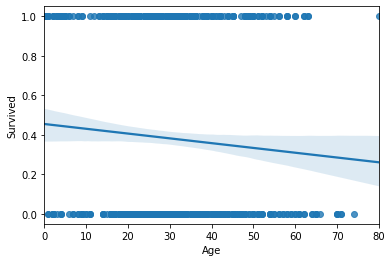

In [65]:
sns.regplot(x='Age',y='Survived',data=df)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

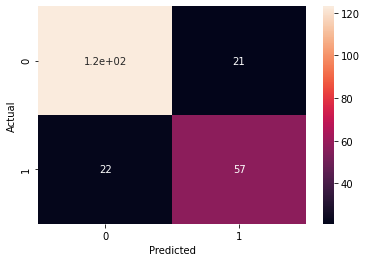

In [66]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [68]:
 false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred)
print('roc_auc_score for LogisiticRegression: ', roc_auc_score(y_test, y_pred))

roc_auc_score for LogisiticRegression:  0.7878428270042194


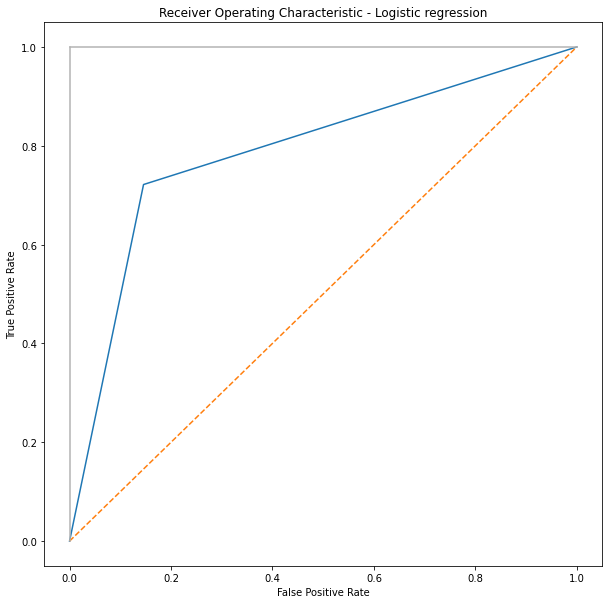

In [69]:
    plt.subplots(1, figsize=(10,10))
    plt.title('Receiver Operating Characteristic - Logistic regression')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()